In [34]:
!pip install pymc==5.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import pymc as pm
import arviz as az
import numpy as np
from matplotlib import pyplot as plt

In [36]:
print(pm.__version__)

5.2.0


In [37]:
r = np.array([0, 18, 8, 46, 8, 13, 9, 31, 14, 8, 29, 24])
n = np.array([47, 148, 119, 810, 211, 196, 148, 215, 207, 97, 256, 360])
N = len(r)
p = r/n

In [38]:
surgical_model = pm.Model()

with surgical_model:
    #Priors for model parameters
    mu = pm.Normal('mu',mu = 0,tau = 1e-6)
    tau = pm.Gamma('tau',alpha = 0.001,beta = 0.001)

    b_model = pm.Normal('b',mu = mu,tau = tau,shape = N)
    p_model = pm.Deterministic('p',pm.math.invlogit(b_model))
    r_model = pm.Binomial('r',n = n,p = p_model,observed = r,shape = N)

    pop_mean = pm.Deterministic('pop.mean',pm.math.exp(mu)/(1 + pm.math.exp(mu)))
    sigma = pm.Deterministic('sigma',1/pm.math.sqrt(tau))

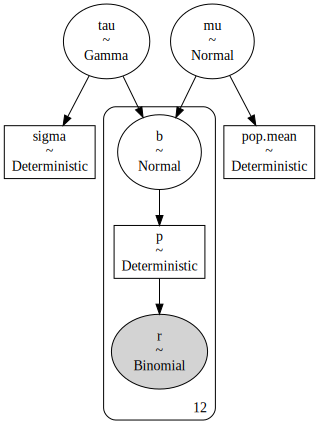

In [39]:
pm.model_to_graphviz(surgical_model)

In [59]:
with surgical_model:
  trace_metropolis = pm.sample(draws = 1000,step = pm.Metropolis())

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'b'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>],
       [<Axes: title={'center': 'pop.mean'}>,
        <Axes: title={'center': 'pop.mean'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

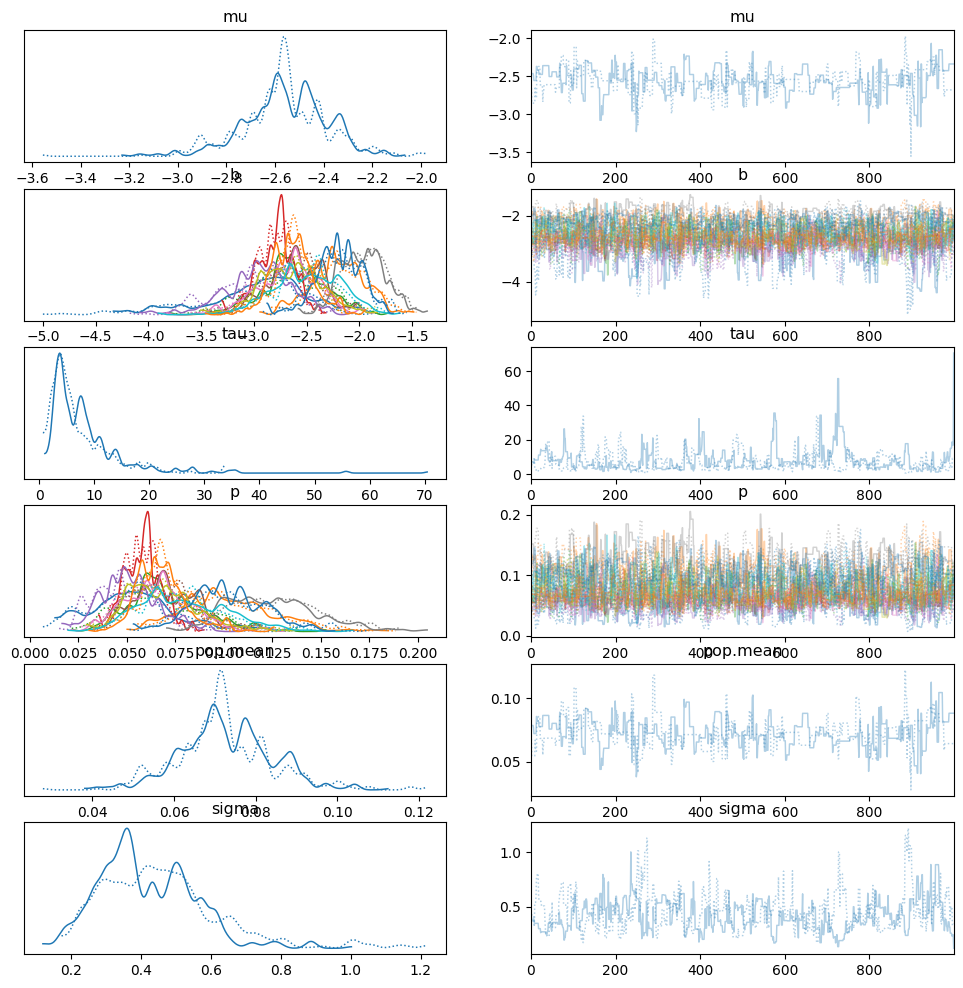

In [60]:
pm.plot_trace(trace_metropolis)

In [61]:
summary_metropolis = pm.summary(trace_metropolis)
summary_metropolis

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,-2.560,0.173,-2.921,-2.283,0.013,0.010,160.0,238.0,1.01
b[0],-2.991,0.501,-4.023,-2.181,0.037,0.026,191.0,327.0,1.01
b[1],-2.191,0.260,-2.710,-1.740,0.019,0.014,186.0,356.0,1.01
b[2],-2.652,0.338,-3.262,-2.019,0.022,0.016,256.0,306.0,1.01
b[3],-2.798,0.174,-3.146,-2.497,0.010,0.007,323.0,289.0,1.02
b[4],-2.980,0.337,-3.648,-2.420,0.022,0.016,222.0,217.0,1.01
b[5],-2.609,0.269,-3.083,-2.094,0.015,0.010,328.0,359.0,1.01
b[6],-2.691,0.307,-3.368,-2.206,0.017,0.012,327.0,392.0,1.01
b[7],-1.957,0.214,-2.313,-1.536,0.018,0.013,146.0,257.0,1.01
b[8],-2.646,0.292,-3.183,-2.075,0.019,0.014,235.0,304.0,1.01


In [62]:
p_predicted_metropolis = summary_metropolis['mean'].values[14:26]
print('Actual number of failures :',r)
print('Predicted number of failures :',np.random.binomial(n,p_predicted_metropolis))

Actual number of failures : [ 0 18  8 46  8 13  9 31 14  8 29 24]
Predicted number of failures : [ 0 15  7 55 12 11 14 35 19 10 30 24]


In [63]:
with surgical_model:
  mean_field = pm.fit(n = 100000, method='advi')
  trace_mean_field = mean_field.sample(draws = 1000)

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'b'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>],
       [<Axes: title={'center': 'pop.mean'}>,
        <Axes: title={'center': 'pop.mean'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

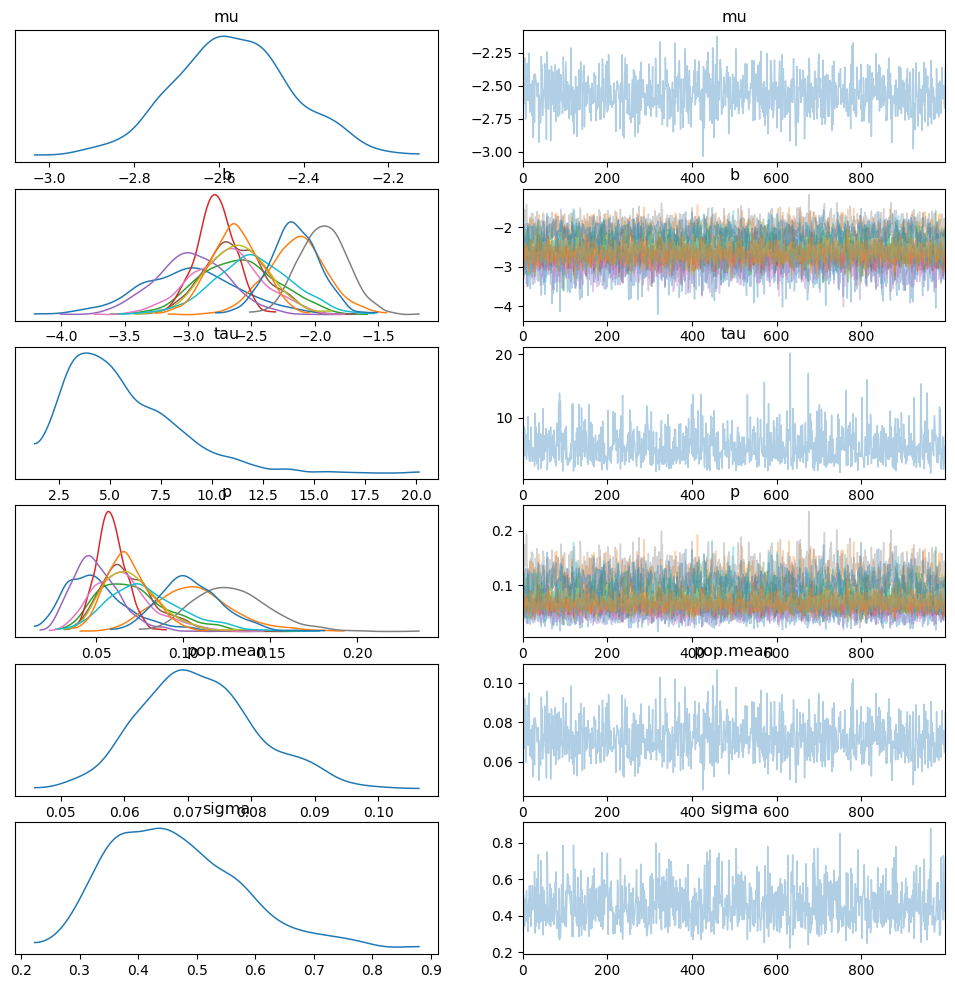

In [64]:
pm.plot_trace(trace_mean_field)

In [65]:
summary_mean_field = pm.summary(trace_mean_field)
summary_mean_field

Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,-2.566,0.140,-2.811,-2.289,0.005,0.003,936.0,905.0,NaN
b[0],-2.988,0.389,-3.632,-2.144,0.013,0.010,843.0,942.0,NaN
b[1],-2.148,0.236,-2.586,-1.684,0.007,0.005,1004.0,990.0,NaN
b[2],-2.603,0.308,-3.095,-1.974,0.009,0.007,1124.0,914.0,NaN
b[3],-2.784,0.151,-3.083,-2.518,0.005,0.004,881.0,873.0,NaN
b[4],-2.977,0.286,-3.506,-2.445,0.009,0.006,971.0,958.0,NaN
b[5],-2.627,0.246,-3.090,-2.182,0.010,0.007,636.0,630.0,NaN
b[6],-2.696,0.286,-3.258,-2.181,0.011,0.008,674.0,883.0,NaN
b[7],-1.934,0.191,-2.285,-1.572,0.006,0.004,1010.0,815.0,NaN
b[8],-2.610,0.248,-3.056,-2.148,0.008,0.006,951.0,891.0,NaN


In [66]:
p_predicted_mean_field = summary_mean_field['mean'].values[14:26]
print('Actual number of failures :',r)
print('Predicted number of failures :',np.random.binomial(n,p_predicted_mean_field))

Actual number of failures : [ 0 18  8 46  8 13  9 31 14  8 29 24]
Predicted number of failures : [ 0 20 11 44 12 17 10 24 14  9 27 33]


In [81]:
b = np.zeros(N)

for i in range(N):
  if p[i] != 0:
    b[i] = np.log(p[i]/(1-p[i]))
  else:
    b[i] = -5

def log_posterior(b,mu,tau):
  N = len(b)
  log_likelihood = (N/2)*np.log(tau/(2*np.pi)) - (tau/2)*np.sum((b - mu)**2)
  log_mu_prior = -(1e-6/2)*(mu**2)
  log_tau_prior = (0.001 - 1)*np.log(tau) - 0.001*tau
  return log_likelihood + log_mu_prior + log_tau_prior

def Metropolis_Hastings(b,num_iterations):
  mu = -2.5
  tau = 1.5
  mu_accepted = []
  tau_accepted = []
  pop_mean_accepted = []
  sigma_accepted = []
  for n in range(num_iterations):
    log_p = log_posterior(b,mu,tau)
    mu_new = np.random.normal(mu,0.05)
    tau_new = np.random.normal(tau,0.05)
    log_p_new = log_posterior(b,mu_new,tau_new)
    r = np.random.uniform(0,1)
    if np.log(r) < min(0,log_p_new - log_p):
      mu_accepted.append(mu_new)
      tau_accepted.append(tau_new)
      pop_mean_accepted.append(np.exp(mu)/(1 + np.exp(mu)))
      sigma_accepted.append(1/np.sqrt(tau))
      mu = mu_new
      tau = tau_new
  return mu_accepted,tau_accepted,pop_mean_accepted,sigma_accepted

num_iterations = 10000
mu_samples,tau_samples,pop_mean_samples,sigma_samples = Metropolis_Hastings(b,num_iterations)

mu_samples = np.array(mu_samples)
tau_samples = np.array(tau_samples)
pop_mean_samples = np.array(pop_mean_samples)
sigma_samples = np.array(sigma_samples)

print('Burn-in period is',num_iterations - len(mu_samples))

print(f'For mu, Mean = {np.mean(mu_samples)}, Median = {np.median(mu_samples)}, Standard Deviation = {np.std(mu_samples)}')
print(f'For tau, Mean = {np.mean(tau_samples)}, Median = {np.median(tau_samples)}, Standard Deviation = {np.std(tau_samples)}')
print(f'For pop.mean, Mean = {np.mean(pop_mean_samples)}, Median = {np.median(pop_mean_samples)}, Standard Deviation = {np.std(pop_mean_samples)}')
print(f'For sigma, Mean = {np.mean(sigma_samples)}, Median = {np.median(sigma_samples)}, Standard Deviation = {np.std(sigma_samples)}')

def inverse_logit(x):
  return 1/(1 + np.exp(-x))

b_predicted = np.random.normal(np.mean(mu_samples),np.mean(sigma_samples),size = N)
p_predicted = inverse_logit(b_predicted)
print('Actual number of failures :',r)
print('Predicted number of failures :',np.random.binomial(n,p_predicted))

Burn-in period is 770
For mu, Mean = -2.75251294221349, Median = -2.713944472113024, Standard Deviation = 0.27743618617201227
For tau, Mean = 1.4225737928088011, Median = 1.3394452480843555, Standard Deviation = 0.6329665106206498
For pop.mean, Mean = 0.06176563550069349, Median = 0.062155521889534444, Standard Deviation = 0.014833736469778126
For sigma, Mean = 0.9142002317362816, Median = 0.8640473015395655, Standard Deviation = 0.24278386425787554
Actual number of failures : [ 0 18  8 46  8 13  9 31 14  8 29 24]
Predicted number of failures : [ 3 12  8 34  3 20 10 12 11  1  7 74]


In [84]:
b = np.zeros(N)

for i in range(N):
  if p[i] != 0:
    b[i] = np.log(p[i]/(1-p[i]))
  else:
    b[i] = -5

a0 = 1e-6
µ_0 = 0
α = 0.001
β = 0.001
α_N = N/2 + α
β_N = 1
µ_N = 1
λ_N = 1
eps = 1e-10
max_iterations = 10000

for iter in range(max_iterations):
  β_N_new = β + (np.sum(b**2) + N*((1/λ_N) + (µ_N)**2) - 2*np.sum(b)*µ_N)/2
  µ_N_new = ((α_N/β_N_new + (µ_0*a0))*np.sum(b))/(a0 + N*(α_N/β_N_new))
  λ_N_new = a0 + N*(α_N/β_N_new)
  if np.abs(β_N_new - β_N) <= eps and np.abs(µ_N_new - µ_N) <= eps and np.abs(λ_N_new - λ_N) <= eps:
    print(f'Reached Convergence at iteration {iter}')
    break
  else:
    β_N = β_N_new
    µ_N = µ_N_new
    λ_N = λ_N_new

print('µ_N =',µ_N)
print('λ_N =',λ_N)
print('α_N = ',α_N)
print('β_N = ',β_N)

num_samples = 1000
mu_samples = []
tau_samples = []
pop_mean_samples = []
sigma_samples = []

for i in range(num_samples):
  mu = np.random.normal(µ_N,1/np.sqrt(λ_N))
  tau = np.random.gamma(α_N,1/β_N)
  mu_samples.append(mu)
  tau_samples.append(tau)
  pop_mean_samples.append(np.exp(mu)/(1 + np.exp(mu)))
  sigma_samples.append(1/np.sqrt(tau))

mu_samples = np.array(mu_samples)
tau_samples = np.array(tau_samples)
pop_mean_samples = np.array(pop_mean_samples)
sigma_samples = np.array(sigma_samples)

print(f'For mu, Mean = {np.mean(mu_samples)}, Median = {np.median(mu_samples)}, Standard Deviation = {np.std(mu_samples)}')
print(f'For tau, Mean = {np.mean(tau_samples)}, Median = {np.median(tau_samples)}, Standard Deviation = {np.std(tau_samples)}')
print(f'For pop.mean, Mean = {np.mean(pop_mean_samples)}, Median = {np.median(pop_mean_samples)}, Standard Deviation = {np.std(pop_mean_samples)}')
print(f'For sigma, Mean = {np.mean(sigma_samples)}, Median = {np.median(sigma_samples)}, Standard Deviation = {np.std(sigma_samples)}')

b_predicted = np.random.normal(np.mean(mu_samples),np.mean(sigma_samples),size = N)
p_predicted = inverse_logit(b_predicted)
print('Actual number of failures :',r)
print('Predicted number of failures :',np.random.binomial(n,p_predicted))

Reached Convergence at iteration 13
µ_N = -2.7119345207952272
λ_N = 17.672710445785558
α_N =  6.001
β_N =  4.0747571967337946
For mu, Mean = -2.717519857237331, Median = -2.7271089203818004, Standard Deviation = 0.23655754853300817
For tau, Mean = 1.5077299329114808, Median = 1.400568185371113, Standard Deviation = 0.6381553170929724
For pop.mean, Mean = 0.06339419611340823, Median = 0.06139254585535925, Standard Deviation = 0.014449125149806437
For sigma, Mean = 0.8715138513351128, Median = 0.8449832940820055, Standard Deviation = 0.19697435682408432
Actual number of failures : [ 0 18  8 46  8 13  9 31 14  8 29 24]
Predicted number of failures : [ 2  6 10 71  8 30  7  6  4  9 19 19]
